<a href="https://colab.research.google.com/github/RobsonCrLira/QuarentenaDadosAlura/blob/master/Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robson Lira



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [115]:
filmes = pd.read_csv('https://raw.githubusercontent.com/RobsonCrLira/QuartentenaDadosAlura/master/ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
filmes.columns  = ["filmeId", "titulo", "generos"]

In [117]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [118]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/RobsonCrLira/QuartentenaDadosAlura/master/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'timestamp']

In [120]:
avaliacoes.head()

,usuarioId,filmeId,nota,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
nota_media_por_filmes = avaliacoes.groupby('filmeId')['nota'].mean()

In [0]:
filmes = filmes.join(nota_media_por_filmes,on = 'filmeId')

#Desafio 1
Pegar os filmes sem avaliação

In [123]:
filmes.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_sem_avaliacao = filmes.query('nota != nota')

In [125]:
filmes_sem_avaliacao

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2

mudar o nomes da coluna nota

In [0]:
filmes.rename(columns={'nota': 'media'}, inplace=True)

In [127]:
filmes.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3
colocar no DF a quantidade de votos por filme

In [0]:
votos_por_filmes = avaliacoes.groupby('filmeId')['nota'].count()

In [0]:
filmes = filmes.join(votos_por_filmes,on='filmeId')

In [0]:
filmes.rename( columns={'nota': 'votos_totais'},inplace=True)

In [131]:
filmes

,filmeId,titulo,generos,media,votos_totais
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


# Desafio 4 

Arredondar a nota para duas casa decimais

In [132]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmeId       9742 non-null   int64  
 1   titulo        9742 non-null   object 
 2   generos       9742 non-null   object 
 3   media         9724 non-null   float64
 4   votos_totais  9724 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 380.7+ KB


In [0]:
for valor in filmes['media'].values:
  filmes['media'] = round(filmes['media'],2)


In [134]:
filmes.head()

,filmeId,titulo,generos,media,votos_totais
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


#Desafio 5

Descobrir quantos filmes possui um unico genero


In [135]:
todos_generos = filmes['generos'].str.split("|",expand=False)
lista = []

for valor in todos_generos.values:
    lista.extend(valor)

filtro['generos'] = pd.DataFrame(lista).dropna()
generos = sorted(filtro[0].unique())
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

#Desafio 6 

contar o numero de aparições de casa genero

In [152]:
aparicores = filtro.groupby('generos').count()
aparicores

,0
generos,
(no genres listed),34
Action,1828
Adventure,1263
Animation,611
Children,664
Comedy,3756
Crime,1199
Documentary,440
Drama,4361


#Desafio 7
plotar.

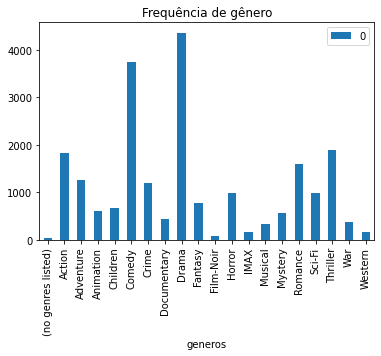

In [146]:
aparicores.plot(kind="bar", title="Frequência de gênero")